# Final Project Submission
* Student name: James M. Irivng, Ph.D.
* Student pace: full time
* Scheduled project review date/time: 05/15/19 2:30 pm
* Instructor name: Jeff Herman / Brandon Lewis
* Blog post URL:


## Iowa Prisoner Recidivism Data

- Source: https://www.kaggle.com/slonnadube/recidivism-for-offenders-released-from-prison
- **Statistics about recidivism in prisoners from a 3 year prisoner**


- **Target:**
    - Recidivism - Return to Prison
    
    
- **Features:**
    - Fiscal Year Released
    - Recidivism Reporting Year
    - Race - Ethnicity
    - Age At Release
    - Convicting Offense Classification
    - Convicting Offense Type
    - Convicting Offense Subtype
    - Main Supervising District
    - Release Type
    - Release type: Paroled to Detainder united
    - Part of Target Population
- what happens 
* then same thing
    - its working 




<img src="https://raw.githubusercontent.com/jirvingphd/dsc-3-final-project-online-ds-ft-021119/master/districtmap09122014.jpg" >

#"LSA_map_with_counties_districts_and_B54A5BBCE4156.jpg" width=50%>

### Detailed variable descriptions:

- **Fiscal Year Released**
    - Fiscal year (year ending June 30) for which the offender was released from prison.

- **Recidivism Reporting Year**
    - Fiscal year (year ending June 30) that marks the end of the 3-year tracking period. For example, offenders exited prison in FY 2012 are found in recidivism reporting year FY 2015.

- **Race - Ethnicity**
    - Offender's Race and Ethnicity

- **Convicting Offense Classification**
    - Maximum penalties: A Felony = Life; B Felony = 25 or 50 years; C Felony = 10 years; D Felony = 5 years; Aggravated Misdemeanor = 2 years; Serious Misdemeanor = 1 year; Simple Misdemeanor = 30 days

- **Convicting Offense Type**
    - General category for the most serious offense for which the offender was placed in prison.

- **Convicting Offense Subtype**
    - Further classification of the most serious offense for which the offender was placed in prison.

- **Release Type**
    - Reasoning for Offender's release from prison.

- **Main Supervising District**
    - The Judicial District supervising the offender for the longest time during the tracking period.

- **Recidivism - Return to Prison**
    - No = No Recidivism; Yes = Prison admission for any reason within the 3-year tracking period
    
- **Part of Target Population** 
    - The Department of Corrections has undertaken specific strategies to reduce recidivism rates for prisoners who are on parole and are part of the target population.
    ___

# USING THE OSEMN MODEL TO GUIDE WORKFLOW

1. **OBTAIN:**
    - [x] Import data, inspect, check for datatypes to convert and null values
<br><br>

2. **SCRUB: cast data types, identify outliers, check for multicollinearity, normalize data**<br>
    - Check and cast data types
    - [x] Check for missing values 
    - [x] Check for multicollinearity
    - [x] Normalize data (may want to do after some exploring)   
    <br><br>
            
3. **EXPLORE:Check distributions, outliers, etc**
    - [x] Check scales, ranges (df.describe())
    - [x] Check histograms to get an idea of distributions (df.hist()) and data transformations to perform
    - [x] Use scatterplots to check for linearity and possible categorical variables (df.plot(kind-'scatter')
    <br><br>

   
4. **FIT AN INITIAL MODEL:** 
    - [x] Assess the model.
        <br><br>
5. **REVISE THE FITTED MODEL**
    - [x] Adjust chosen model and hyper-parameters
    <br><br>
6. **HOLDOUT VALIDATION**
    - [ ] Perform cross-validation
___

# OBTAIN:
## Importing Packages


<!--- ### Using Custom PyPi Package - BroadSteel DataScience (bs_ds)

<img src="https://bs-ds.readthedocs.io/en/latest/_images/bs_ds_logo.png" width=200>

- **Used several EDA functions from bs_ds.bamboo module:**
    - inspect_df
        - https://bs-ds.readthedocs.io/en/latest/bs_ds.html#bs_ds.bamboo.inspect_df
    - check_null
        - https://bs-ds.readthedocs.io/en/latest/bs_ds.html#bs_ds.bamboo.check_null
    - check_unique
        - https://bs-ds.readthedocs.io/en/latest/bs_ds.html#bs_ds.bamboo.check_unique
    - check_column
        - https://bs-ds.readthedocs.io/en/latest/bs_ds.html#bs_ds.bamboo.check_column
    - check_numeric
        - https://bs-ds.readthedocs.io/en/latest/bs_ds.html#bs_ds.bamboo.check_numeric
    - big_pandas
        - https://bs-ds.readthedocs.io/en/latest/bs_ds.html#bs_ds.bamboo.big_pandas
    - ignore_warnings
        - https://bs-ds.readthedocs.io/en/latest/bs_ds.html#bs_ds.bamboo.ignore_warnings
    - drop_cols
        - https://bs-ds.readthedocs.io/en/latest/bs_ds.html#bs_ds.bamboo.drop_cols --->

In [1]:
!pip install -U fsds_100719

from fsds_100719.imports import *

fsds_1007219  v0.7.20 loaded.  Read the docs: https://fsds.readthedocs.io/en/latest/ 


[i] Pandas .iplot() method activated.


In [2]:
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-notebook')



In [3]:
### Style
# # Import custom python package BroadSteel DataScience (bs_ds_)
# from bs_ds.imports import *
# from bs_ds.bamboo import  inspect_df, check_null, check_unique, check_column, check_numeric, big_pandas, ignore_warnings
# from bs_ds import ihelp, ihelp_menu

# import bs_ds as bs

# from bs_ds.imports import *

# # Enabling full-sized dataframes and info rows
# big_pandas()

# # Turning off warnings for function deprecations
# ignore_warnings()



## Loading the dataset and removing unrelated columns

In [4]:
# Dataset Links
full_all_prisoners_file = "datasets/FULL_3-Year_Recidivism_for_Offenders_Released_from_Prison_in_Iowa.csv"
# only_repeat_criminals_w_new_crime_file= "datasets/prison_recidivists_with_recidivism_type_only.csv"

# Will be using the all_prisoners file to predict recidivism
df = pd.read_csv(full_all_prisoners_file)

df.columns = [col.lower().replace(' ','_') for col in df.columns]


df.columns = [col.replace('_-_','_') for col in df.columns]
df =df.rename({'recidivism_return_to_prison':'recividist'},axis=1)
df

fiscal_year_released  recidivism_reporting_year        race_ethnicity  \
0                      2010                       2013  Black - Non-Hispanic   
1                      2010                       2013  White - Non-Hispanic   
2                      2010                       2013  White - Non-Hispanic   
3                      2010                       2013  White - Non-Hispanic   
4                      2010                       2013  Black - Non-Hispanic   
...                     ...                        ...                   ...   
26015                  2015                       2018      White - Hispanic   
26016                  2015                       2018  White - Non-Hispanic   
26017                  2015                       2018  White - Non-Hispanic   
26018                  2015                       2018  White - Non-Hispanic   
26019                  2015                       2018  White - Non-Hispanic   

      age_at_release_ convicting_offense_classification  \
0               25-34                          C Felony   
1               25-34                          D Felony   
2               35-44                          B Felony   
3               25-34                          B Felony   
4               35-44                          D Felony   
...               ...                               ...   
26015        Under 25                          C Felony   
26016           35-44                          C Felony   
26017           25-34            Aggravated Misdemeanor   
26018           25-34                          D Felony   
26019           35-44                          D Felony   

      convicting_offense_type convicting_offense_subtype  \
0                     Violent                    Robbery   
1                    Property                      Theft   
2                        Drug                Trafficking   
3                       Other             Other Criminal   
4                     Violent                    Assault   
...                       ...                        ...   
26015                 Violent                    Assault   
26016                 Violent                        Sex   
26017            Public Order                    Traffic   
26018                Property                      Theft   
26019                 Violent        Murder/Manslaughter   

                             release_type main_supervising_district  \
0                                  Parole                       7JD   
1            Discharged – End of Sentence                       NaN   
2                                  Parole                       5JD   
3                                  Parole                       6JD   
4            Discharged – End of Sentence                       NaN   
...                                   ...                       ...   
26015           Paroled to Detainer - INS                       NaN   
26016        Released to Special Sentence                       6JD   
26017                      Parole Granted                       5JD   
26018       Paroled w/Immediate Discharge                       5JD   
26019  Paroled to Detainer - Out of State                       NaN   

      recividist  days_to_recidivism new_conviction_offense_classification  \
0            Yes               433.0                              C Felony   
1            Yes               453.0                                   NaN   
2            Yes               832.0                                   NaN   
3             No                 NaN                                   NaN   
4            Yes               116.0                                   NaN   
...          ...                 ...                                   ...   
26015         No                 NaN                                   NaN   
26016         No                 NaN                                   NaN   
26017         No                 NaN                         

In [5]:
from pandas_profiling import ProfileReport
ProfileReport(df)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26020 entries, 0 to 26019
Data columns (total 17 columns):
fiscal_year_released                     26020 non-null int64
recidivism_reporting_year                26020 non-null int64
race_ethnicity                           25990 non-null object
age_at_release_                          26017 non-null object
convicting_offense_classification        26020 non-null object
convicting_offense_type                  26020 non-null object
convicting_offense_subtype               26020 non-null object
release_type                             24258 non-null object
main_supervising_district                16439 non-null object
recividist                               26020 non-null object
days_to_recidivism                       8681 non-null float64
new_conviction_offense_classification    6718 non-null object
new_conviction_offense_type              6718 non-null object
new_conviction_offense_sub_type          6699 non-null object
part_of_target

**Any columns that are about New Convictions or days to recidivism should be dropped for our initial model predicting recidivism.**
- "New..", "Days to Recividism"

In [7]:
drop_cols = list(filter(lambda x: 'new' in x ,df.columns))
drop_cols.extend(list(filter(lambda x: 'recidivism' in x ,df.columns)))
drop_cols

['new_conviction_offense_classification',
 'new_conviction_offense_type',
 'new_conviction_offense_sub_type',
 'recidivism_reporting_year',
 'days_to_recidivism',
 'recidivism_type']

In [8]:
df = df.drop(columns=drop_cols)
df

fiscal_year_released        race_ethnicity age_at_release_  \
0                      2010  Black - Non-Hispanic           25-34   
1                      2010  White - Non-Hispanic           25-34   
2                      2010  White - Non-Hispanic           35-44   
3                      2010  White - Non-Hispanic           25-34   
4                      2010  Black - Non-Hispanic           35-44   
...                     ...                   ...             ...   
26015                  2015      White - Hispanic        Under 25   
26016                  2015  White - Non-Hispanic           35-44   
26017                  2015  White - Non-Hispanic           25-34   
26018                  2015  White - Non-Hispanic           25-34   
26019                  2015  White - Non-Hispanic           35-44   

      convicting_offense_classification convicting_offense_type  \
0                              C Felony                 Violent   
1                              D Felony                Property   
2                              B Felony                    Drug   
3                              B Felony                   Other   
4                              D Felony                 Violent   
...                                 ...                     ...   
26015                          C Felony                 Violent   
26016                          C Felony                 Violent   
26017            Aggravated Misdemeanor            Public Order   
26018                          D Felony                Property   
26019                          D Felony                 Violent   

      convicting_offense_subtype                        release_type  \
0                        Robbery                              Parole   
1                          Theft        Discharged – End of Sentence   
2                    Trafficking                              Parole   
3                 Other Criminal                              Parole   
4                        Assault        Discharged – End of Sentence   
...                          ...                                 ...   
26015                    Assault           Paroled to Detainer - INS   
26016                        Sex        Released to Special Sentence   
26017                    Traffic                      Parole Granted   
26018                      Theft       Paroled w/Immediate Discharge   
26019        Murder/Manslaughter  Paroled to Detainer - Out of State   

      main_supervising_district recividist part_of_target_population     sex  
0                           7JD        Yes                       Yes    Male  
1                           NaN        Yes                        No    Male  
2                           5JD        Yes                       Yes    Male  
3                           6JD         No                       Yes    Male  
4                           NaN        Yes                        No    Male  
...                         ...        ...                       ...     ...  
26015                       NaN         No                       Yes    Male  
26016                       6JD         No                        No    Male  
26017                       5JD         No                        No  Female  
26018                       5JD         No                       Yes    Male  
26019                       NaN        Yes                       Yes    Male  

[26020 rows x 11 columns]

### Save original names vs short names in column_legend
- then map names onto columns

In [9]:
print(df.columns)

Index(['fiscal_year_released', 'race_ethnicity', 'age_at_release_',
       'convicting_offense_classification', 'convicting_offense_type',
       'convicting_offense_subtype', 'release_type',
       'main_supervising_district', 'recividist', 'part_of_target_population',
       'sex'],
      dtype='object')


In [10]:
# New short-hand names to use
colnames_short = ('yr_released','race_ethnicity',
                  'age_released','crime_class','crime_type',
                  'crime_subtype','release_type','super_dist',
                  'recidivist','target_pop','sex')

# Zipping the original and new into a renaming dictionary
column_legend = dict(zip(df.columns,colnames_short))
# Rename df with shorter names
df.rename(mapper=column_legend, axis=1, inplace=True)
df.head()

yr_released        race_ethnicity age_released crime_class crime_type  \
0         2010  Black - Non-Hispanic        25-34    C Felony    Violent   
1         2010  White - Non-Hispanic        25-34    D Felony   Property   
2         2010  White - Non-Hispanic        35-44    B Felony       Drug   
3         2010  White - Non-Hispanic        25-34    B Felony      Other   
4         2010  Black - Non-Hispanic        35-44    D Felony    Violent   

    crime_subtype                  release_type super_dist recidivist  \
0         Robbery                        Parole        7JD        Yes   
1           Theft  Discharged – End of Sentence        NaN        Yes   
2     Trafficking                        Parole        5JD        Yes   
3  Other Criminal                        Parole        6JD         No   
4         Assault  Discharged – End of Sentence        NaN        Yes   

  target_pop   sex  
0        Yes  Male  
1         No  Male  
2        Yes  Male  
3        Yes  Male  
4         No  Male

In [11]:
df.to_csv('iowa_recidivism_renamed_2020.csv')

# SCRUB / EXPLORE
## EDA with Pandas_Profiling

In [12]:
# import pandas_profiling as pp

## ADDRESSING NULL VALUES

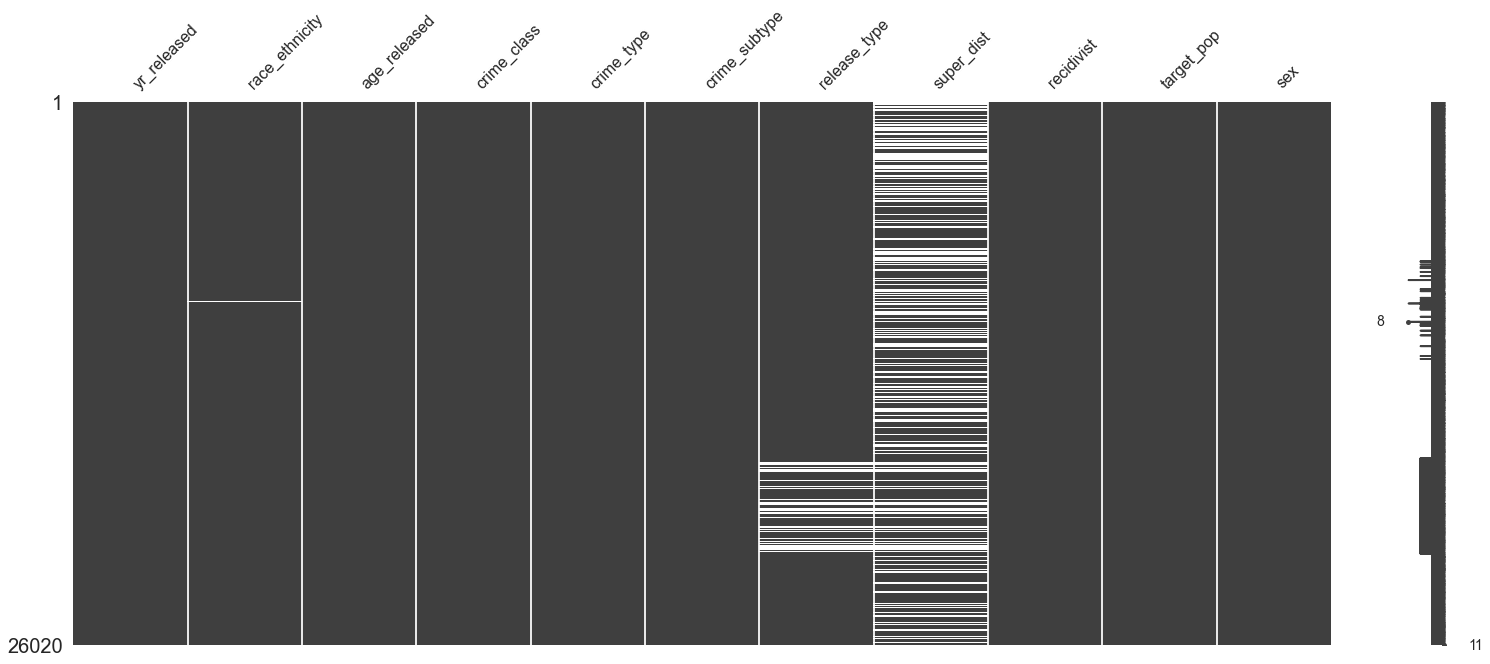

In [13]:
# pp.ProfileReport(df)
import missingno as miss
miss.matrix(df)

In [14]:
df['super_dist'].value_counts(normalize=True,dropna=False)

NaN                   0.368217
5JD                   0.191468
1JD                   0.107110
2JD                   0.076403
8JD                   0.059800
7JD                   0.058186
3JD                   0.045657
6JD                   0.042198
4JD                   0.025634
ISC                   0.013451
Interstate Compact    0.011875
Name: super_dist, dtype: float64

In [15]:
df['super_dist'].fillna('missing',inplace=True)

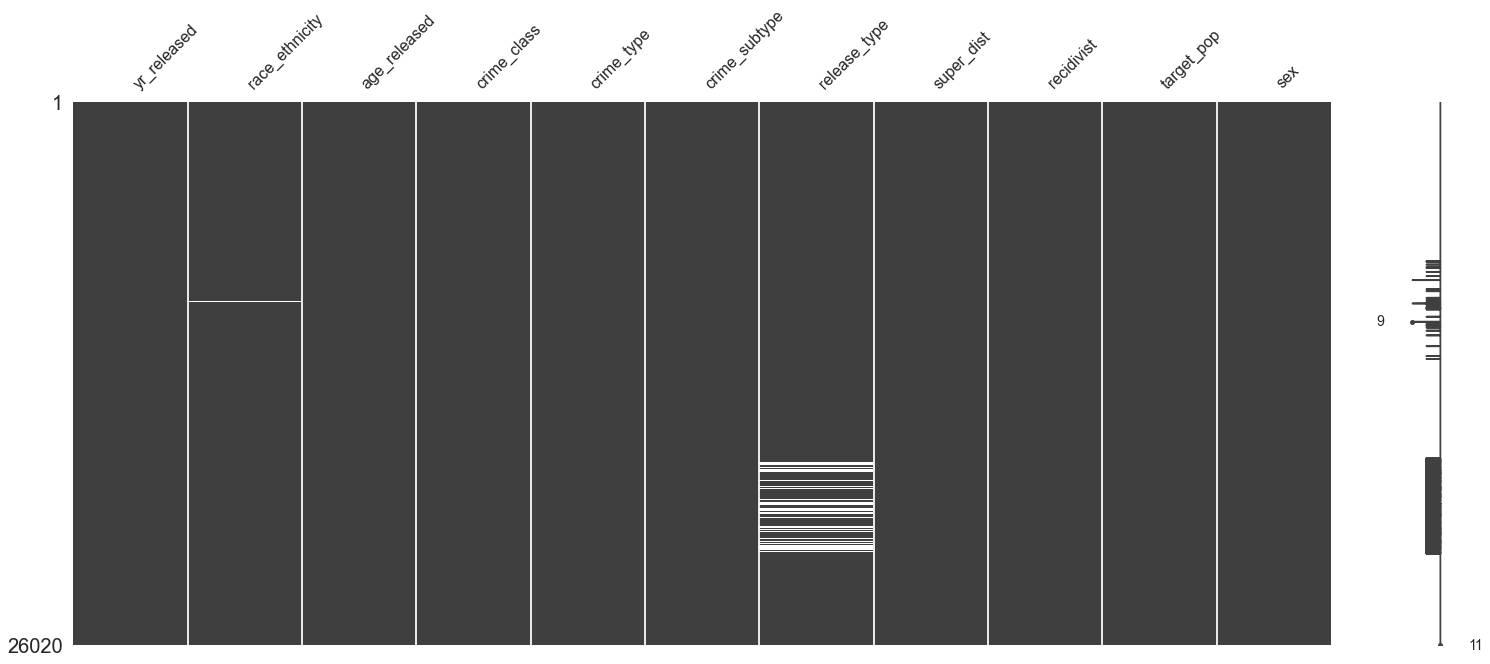

In [16]:
miss.matrix(df)

In [17]:
df['release_type'].value_counts(normalize=True, dropna=False)

Parole                                 0.377018
Parole Granted                         0.214335
Discharged – End of Sentence           0.193659
Discharged - Expiration of Sentence    0.089739
NaN                                    0.067717
Released to Special Sentence           0.015411
Special Sentence                       0.013336
Paroled w/Immediate Discharge          0.012836
Paroled to Detainer - Out of State     0.005265
Paroled to Detainer - INS              0.005150
Paroled to Detainer - U.S. Marshall    0.002959
Paroled to Detainer - Iowa             0.002537
Interstate Compact Parole              0.000038
Name: release_type, dtype: float64

In [18]:
df['release_type'].fillna('missing',inplace=True)

In [19]:
df.isna().sum()

yr_released        0
race_ethnicity    30
age_released       3
crime_class        0
crime_type         0
crime_subtype      0
release_type       0
super_dist         0
recidivist         0
target_pop         0
sex                3
dtype: int64

**Results of Null Check**
- race_ethnicity has 30 (0.12% of data)
    -  drop
- age_released has 3 (0.01% of data)
    - drop
- sex has 3 (0.01% of data)
    - drop
- super_district has 9581(36.82% of data)
    - replace with "unknown"
- release_type has 1762 (6.77% of data)
    - drop
    
**Dropping all null values from age_released, race_ethnicity, and release_type.**

In [20]:
# Filling NA's in super_dist and release_type
df.dropna(subset=['age_released','race_ethnicity','sex','release_type'],inplace=True)
# df['super_dist'].fillna("unknown", inplace=True)
df.isna().sum()

yr_released       0
race_ethnicity    0
age_released      0
crime_class       0
crime_type        0
crime_subtype     0
release_type      0
super_dist        0
recidivist        0
target_pop        0
sex               0
dtype: int64

___
## COMBINING AND REMAPPING CLASSES

### df['race_ethnicity']

- **Remapping race_ethnicity**
    - Due to the low numbers for several of the race_ethnicity types, reducing and combining Hispanic and Non-Hispanic groups
    - Alternative approach of separating race and ethnicity into 2 separate features was rejected after modeling

In [21]:
df['race_ethnicity'].value_counts(dropna=False)

White - Non-Hispanic                               17584
Black - Non-Hispanic                                6109
White - Hispanic                                    1522
American Indian or Alaska Native - Non-Hispanic      502
Asian or Pacific Islander - Non-Hispanic             192
Black - Hispanic                                      37
American Indian or Alaska Native - Hispanic           20
White -                                               12
Asian or Pacific Islander - Hispanic                   5
N/A -                                                  2
Black -                                                2
Name: race_ethnicity, dtype: int64

In [22]:
# Defining Dictionary Map for race_ethnicity categories
race_ethnicity_map = {'White - Non-Hispanic':'White',
                        'Black - Non-Hispanic': 'Black',
                        'White - Hispanic' : 'Hispanic',
                        'American Indian or Alaska Native - Non-Hispanic' : 'American Native',
                        'Asian or Pacific Islander - Non-Hispanic' : 'Asian or Pacific Islander',
                        'Black - Hispanic' : 'Black',
                        'American Indian or Alaska Native - Hispanic':'American Native',
                        'White -' : 'White',
                        'Asian or Pacific Islander - Hispanic' : 'Asian or Pacific Islander',
                        'N/A -' : np.nan,
                        'Black -':'Black'}

# Replacing original race_ethnicity column with remapped one.
df['race_ethnicity'] = df['race_ethnicity'].map(race_ethnicity_map)

In [23]:
df.head()

yr_released race_ethnicity age_released crime_class crime_type  \
0         2010          Black        25-34    C Felony    Violent   
1         2010          White        25-34    D Felony   Property   
2         2010          White        35-44    B Felony       Drug   
3         2010          White        25-34    B Felony      Other   
4         2010          Black        35-44    D Felony    Violent   

    crime_subtype                  release_type super_dist recidivist  \
0         Robbery                        Parole        7JD        Yes   
1           Theft  Discharged – End of Sentence    missing        Yes   
2     Trafficking                        Parole        5JD        Yes   
3  Other Criminal                        Parole        6JD         No   
4         Assault  Discharged – End of Sentence    missing        Yes   

  target_pop   sex  
0        Yes  Male  
1         No  Male  
2        Yes  Male  
3        Yes  Male  
4         No  Male

In [24]:
df['race_ethnicity'].value_counts(dropna=False)

White                        17596
Black                         6148
Hispanic                      1522
American Native                522
Asian or Pacific Islander      197
NaN                              2
Name: race_ethnicity, dtype: int64

### df['crime_class']

- **Remapping crime_class**
    - Combine 'Other Felony' and 'Other Felony (Old Code)' -> nan
    - Other Misdemeanor -> np.nan
    - Felony - Mandatory Minimum -> np.nan
    - Special Sentence 2005 -> Sex Offender
    - 'Sexual Predator Community Supervision' -> 'Sex Offender'
    - Other Felony -> np.nan    

In [25]:
df['crime_class'].value_counts()

D Felony                                    10478
C Felony                                     6796
Aggravated Misdemeanor                       4916
B Felony                                     1763
Felony - Enhancement to Original Penalty     1532
Felony - Enhanced                             220
Serious Misdemeanor                           155
Special Sentence 2005                          98
Felony - Mandatory Minimum                     11
Other Felony                                    6
A Felony                                        4
Simple Misdemeanor                              3
Sexual Predator Community Supervision           2
Other Felony (Old Code)                         2
Other Misdemeanor                               1
Name: crime_class, dtype: int64

In [26]:
# Remapping
crime_class_map = {'Other Felony (Old Code)': np.nan ,#or other felony
                  'Other Misdemeanor':np.nan,
                   'Felony - Mandatory Minimum':np.nan, # if minimum then lowest sentence ==  D Felony
                   'Special Sentence 2005': 'Sex Offender',
                   'Other Felony' : np.nan ,
                   'Sexual Predator Community Supervision' : 'Sex Offender',
                   'D Felony': 'D Felony',
                   'C Felony' :'C Felony',
                   'B Felony' : 'B Felony',
                   'A Felony' : 'A Felony',
                   'Aggravated Misdemeanor':'Aggravated Misdemeanor',
                   'Felony - Enhancement to Original Penalty':'Felony - Enhanced',
                   'Felony - Enhanced':'Felony - Enhanced' ,
                   'Serious Misdemeanor':'Serious Misdemeanor',
                   'Simple Misdemeanor':'Simple Misdemeanor'}

df['crime_class'] = df['crime_class'].map(crime_class_map)

### df['age_released']

- **Encoding age groups as ordinal**

In [27]:
# Encoding age groups as ordinal
age_ranges = ('Under 25','25-34', '35-44','45-54','55 and Older')
age_codes = (20,30,40,50,60)
# age_codes = (0,1,2,3,4) 
# Zipping into Dictionary to Map onto Column
age_map = dict(zip(age_ranges,age_codes))

# Mapping age_map onto 'age_released'
df['age_released'] = df['age_released'].map(age_map)
df['age_released'].value_counts()#dropna=False)

30    9543
40    6217
20    4585
50    4340
60    1302
Name: age_released, dtype: int64

### Remapping binary categories df[['recidivist','target_pop','sex']]

In [28]:
## Remapping binary categories

# Recidivist
recidivist_map = {'No':0,'Yes':1}
df['recidivist'] = df['recidivist'].map(recidivist_map)

# Target_pop
target_pop_map = {'No':0,'Yes':1}
df['target_pop'] = df['target_pop'].map(target_pop_map)

#sex_map
sex_map = {'Male':0,'Female':1}
df['sex'] = df['sex'].map(sex_map)

___
## ENGINEERING FEATURES
- **Engineering a simple 'felony' true false category**
- **Combining crime_type and crime_subtype into types_combined**

### Creating a simple 'felony' feature

In [29]:
# Engineering a simple 'felony' true false category
df['felony'] = df['crime_class'].str.contains('felony',case=False)
df['crime_types_combined'] = df['crime_type']+'_'+df['crime_subtype']
# Combining crime_type and crime_subtype into types_combined
df['crime_class_type_subtype']= df['crime_class']+'_'+df['crime_type']+'_'+df['crime_subtype']

### Creating a 'max_sentence' feature based on crime class max penalties
   

In [30]:
# Mapping years onto crime class
crime_class_max_sentence_map = {'A Felony': 75,  # Life
                                'Aggravated Misdemeanor': 2, # 2 years
                                'B Felony': 50, # 25 or 50 years
                                'C Felony': 10, # 10 years
                                'D Felony': 5,  # 5 yeras
                                'Felony - Enhanced': 10, # Add on to class C and D felonies, hard to approximate. 
                                'Serious Misdemeanor': 1, # 1 year
                                'Sex Offender': 10, # 10 years
                                'Simple Misdemeanor': 0.83} # 30 days

# Mapping max_sentence_column
df['max_sentence'] =df['crime_class'].map(crime_class_max_sentence_map)

### Dropping all  values replaced with np.nan

In [31]:
df.isna().sum()

yr_released                  0
race_ethnicity               2
age_released                 0
crime_class                 20
crime_type                   0
crime_subtype                0
release_type                 0
super_dist                   0
recidivist                   0
target_pop                   0
sex                          0
felony                      20
crime_types_combined         0
crime_class_type_subtype    20
max_sentence                20
dtype: int64

In [32]:
df.dropna(inplace=True)
df.reset_index(inplace=True)
df.isna().sum()

index                       0
yr_released                 0
race_ethnicity              0
age_released                0
crime_class                 0
crime_type                  0
crime_subtype               0
release_type                0
super_dist                  0
recidivist                  0
target_pop                  0
sex                         0
felony                      0
crime_types_combined        0
crime_class_type_subtype    0
max_sentence                0
dtype: int64

In [33]:
df.to_csv('Iowa_recidivism_features_cleaned_2020.csv')

## Processing Chosen Feature Columns

In [34]:
# List of features to be analyzed as categories
category_cols = ['yr_released','race_ethnicity', 'crime_class',
                 'release_type','crime_type','crime_subtype',
                 'target_pop','sex','super_dist','felony']

# List of features to be analzyed as numbers
number_cols = ['max_sentence','age_released']

# Target feature
target_col = ['recidivist']

In [35]:
# Creating new dataframe ('df_to_split') to contain processed features for train_test_split
df_to_split=pd.DataFrame()

# MinMaxing Numerical Columns
from sklearn.preprocessing import MinMaxScaler
sca = MinMaxScaler()

for header in number_cols:
    print(header)
    data = np.array(df[header])
    res = sca.fit_transform(data.reshape(-1,1))
    df_to_split[header] = res.ravel()    

max_sentence
age_released


## 01/28/20: Replace LabelEncoding with OneHot

- Scratch that, forgot about catboost

In [36]:
# df_to_split = df.copy()
# df_to_split = pd.get_dummies(df_to_split,columns=category_cols)
# df_to_split.head()

In [37]:
# Convert categories to cat.codes
for header in category_cols:
    df_to_split[header] = df[header].astype('category')
    df_to_split[header] = df_to_split[header].cat.codes
    
df_to_split.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25965 entries, 0 to 25964
Data columns (total 12 columns):
max_sentence      25965 non-null float64
age_released      25965 non-null float64
yr_released       25965 non-null int8
race_ethnicity    25965 non-null int8
crime_class       25965 non-null int8
release_type      25965 non-null int8
crime_type        25965 non-null int8
crime_subtype     25965 non-null int8
target_pop        25965 non-null int8
sex               25965 non-null int8
super_dist        25965 non-null int8
felony            25965 non-null int8
dtypes: float64(2), int8(10)
memory usage: 659.4 KB


In [38]:
# df_to_split.dtypes

# FITTING AN INITIAL MODEL
~~##Surveying Potential Algorithms with bs_ds~~
- select_pca:
    - https://bs-ds.readthedocs.io/en/latest/bs_ds.html#bs_ds.bs_ds.select_pca
- thick_pipe:
    - https://bs-ds.readthedocs.io/en/latest/bs_ds.html#bs_ds.bs_ds.thick_pipe


### >>> Fast-Forwarding through trial and error:
- Regardless of changes to preprocessing and feature engineering, accuracy scores never increased about 0.68
- One major concern was the vast majority of our features are categorical.
    - Therefore, we investigated using another Machine Learning package, **CatBoost**

## FITTING AN INITIAL MODEL USING CatBoostClassifier

In [39]:
df_to_split.head()

max_sentence  age_released  yr_released  race_ethnicity  crime_class  \
0      0.123635          0.25            0               2            3   
1      0.056222          0.25            0               4            4   
2      0.662936          0.50            0               4            2   
3      0.662936          0.25            0               4            2   
4      0.056222          0.50            0               2            4   

   release_type  crime_type  crime_subtype  target_pop  sex  super_dist  \
0             2           4             16           1    0           6   
1             1           2             21           0    0          10   
2             2           0             23           1    0           4   
3             2           1             11           1    0           5   
4             1           4              3           0    0          10   

   felony  
0       1  
1       1  
2       1  
3       1  
4       1

In [41]:
# Target feature
target_col = ['recidivist']
# Define X and y to split
y = df[target_col]
X = df_to_split#.drop(target_col)
# y = pd.Series(df[target_col].to_numpy().ravel())
# y.name = 'recidivist'

# List of features to be analyzed as categories
category_cols = ['race_ethnicity', 'crime_class',
                 'release_type','crime_type','crime_subtype',
                 'target_pop','sex','super_dist','felony']

# List of features to be analzyed as numbers
number_cols = ['max_sentence','age_released']



In [42]:
# Split into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [44]:
# Import catboost Pool to create training and testing pools
from catboost import Pool, CatBoostClassifier

train_pool =  Pool(data=X_train, label=y_train, cat_features=category_cols)
test_pool = Pool(data=X_test, label=y_test,  cat_features=category_cols)

In [45]:
# Instantiating CatBoostClassifier 
cb_base = CatBoostClassifier(iterations=300, depth=12,
                            boosting_type='Ordered',
                            learning_rate=0.03,
                            thread_count=-1,
                            eval_metric='AUC',
                            silent=True,
                            allow_const_label=True)#,
#                             task_type='GPU')

In [46]:
# Fitting Initial CatBoost Model
cb_base.fit(train_pool,eval_set=test_pool, plot=True, early_stopping_rounds=30)
cb_base.best_score_

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

{'learn': {'Logloss': 0.5759283803015771},
 'validation': {'Logloss': 0.5885857876268942, 'AUC': 0.6859827550292892}}

### VISUAL SUMMARY OF BASE MODEL

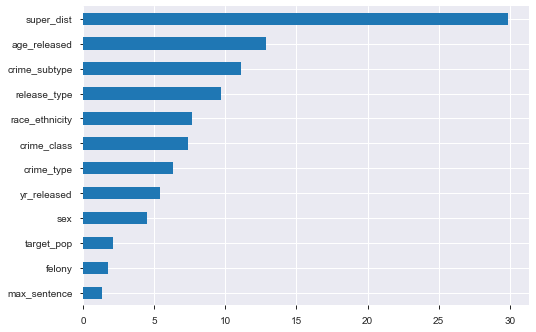

In [47]:
# Plotting Feature Importances
important_feature_names = cb_base.feature_names_
important_feature_scores = cb_base.feature_importances_

important_features = pd.Series(important_feature_scores, index = important_feature_names)
important_features.sort_values().plot(kind='barh')

#### Defining Roc_Auc Curve

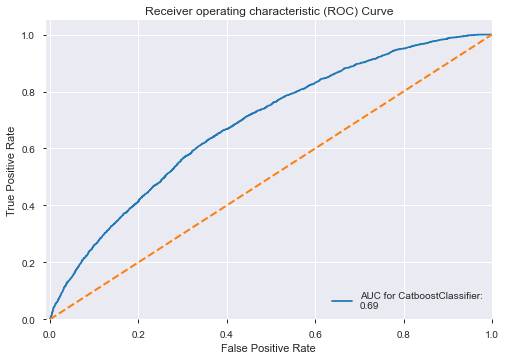

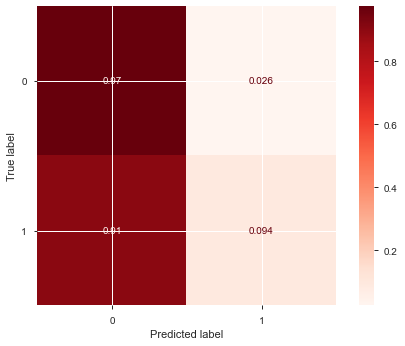

In [49]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

# Define plot_auc_roc_curve
def plot_auc_roc_curve(y_test, y_test_pred):
    """ Takes y_test and y_test_pred from a ML model and plots the AUC-ROC curve."""
    auc = roc_auc_score(y_test, y_test_pred[:,1])

    FPr, TPr, thresh  = roc_curve(y_test, y_test_pred[:,1])
    plt.plot(FPr, TPr,label=f"AUC for CatboostClassifier:\n{round(auc,2)}" )

    plt.plot([0, 1], [0, 1],  lw=2,linestyle='--')
    plt.xlim([-0.01, 1.0])
    plt.ylim([0.0, 1.05])

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

# Plot roc_auc_curve
y_test_pred = cb_base.predict_proba(X_test)
plot_auc_roc_curve(y_test, y_test_pred)

import itertools
# from bs_ds.bs_ds import plot_confusion_matrix
from sklearn.metrics import plot_confusion_matrix

y_test_pred = cb_base.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_test_pred)

plot_confusion_matrix(cb_base,X_test,y_test, normalize='true', cmap='Reds')#,
#                       title='Confusion Matrix:\n CatBoost Recidivist Classifcation\n')

# plot_confusion_matrix(conf_matrix, classes=['Non-Recidivist', 'Recidivist'], normalize=True, cmap='Reds',
#                       title='Confusion Matrix:\n CatBoost Recidivist Classifcation\n')

### Notes Following Initial Modeling:
- The ROC-AUC Curve Shows that our model performs better than chance. 
- HOWEVE, There is a major issue with our confusion matrix.
    - There are an extremely high # of False Negatives (prisoners Predicted to be "Non-Recidivist",but were actually "Recidivist")
    - This is a serious flaw with the model and serious hinders real-world applicability. 
- This may be due to the imbalance of cases of recidivists vs non-recidivists in our dataset.

# REVISING THE MODEL
## Balancing Target Classes Using Synthetic Minority Oversampling

In [50]:
# pause

In [51]:
# # Define X and y 
# X = df_to_split
# y = pd.Series(df[target_col].to_numpy().ravel())
# y.name = 'recidivist'

In [52]:
# df=pd.concat([y,X], axis=1)

In [53]:
# import pandas_profiling as pp
# pp.ProfileReport(df)

### Addressing the Imbalanced Class Issue
- Adding Synthetic Minority Oversampling Technique to balance out the # of recidivists(1) and non-recidivists(0)

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y.values, test_size=0.2)#0.4)

y_train = pd.Series(y_train.ravel())
y_test = pd.Series(y_test.ravel())

from imblearn.over_sampling import SMOTE

# print(pd.Series(y).value_counts())
# print(y.value_counts())
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train,y_train)

# pd.Series(y_train_smote).value_counts()

Using TensorFlow backend.


In [56]:
# List of features to be analyzed as categories
category_cols = ['yr_released','race_ethnicity', 'crime_class',
                 'release_type','crime_type','crime_subtype',
                 'target_pop','sex','super_dist','felony']

# List of features to be analzyed as numbers
number_cols = ['max_sentence','age_released']

# Target feature
target_col = ['recidivist']

In [57]:
# # Reformatting SMOTE transformed data

# # X_resampled back to a dataframe
# X_resampled = pd.DataFrame(X_resampled, columns = X.columns)

# # X_resampled category columns back to integers
# for header in category_cols:
#     X_resampled[header] = X_resampled[header].astype('int')
    
# # y_resampled back to a named series    
# y_resampled = pd.Series(y_resampled)
# y_resampled.name ='recidivist'

### Fitting a Revised Model with Balanced Classes

In [58]:
from catboost import Pool, CatBoostClassifier
train_pool =  Pool(data=X_train, label=y_train, cat_features=category_cols)
test_pool = Pool(data=X_test, label=y_test,  cat_features=category_cols)

In [59]:
cb_clf = CatBoostClassifier(iterations=300, depth=10,
                            boosting_type='Ordered',
                            learning_rate=0.03,
                            thread_count=-1,
                            eval_metric='AUC',
                            silent=True,
                            allow_const_label=True)#,
#                             task_type='GPU')


In [60]:
cb_clf.fit(train_pool,eval_set=test_pool, plot=True, early_stopping_rounds=20)
cb_clf.best_score_

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

{'learn': {'Logloss': 0.522697315326288},
 'validation': {'Logloss': 0.5985031907243944, 'AUC': 0.6913067430952928}}

_____________________________________________

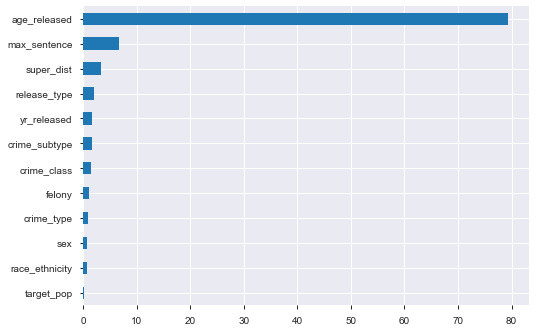

In [61]:
# Plotting Feature Importances
important_feature_names = cb_clf.feature_names_
important_feature_scores = cb_clf.feature_importances_

important_features = pd.Series(important_feature_scores, index = important_feature_names)

important_features.sort_values().plot(kind='barh')

## Visual Summary

### AUC-ROC Curve

In [62]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

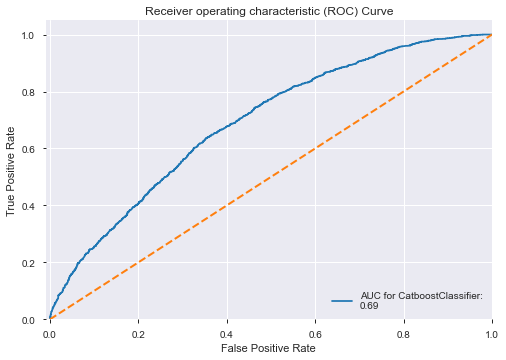

In [63]:
y_test_pred = cb_clf.predict_proba(X_test)
plot_auc_roc_curve(y_test, y_test_pred)

### Confusion Matrix


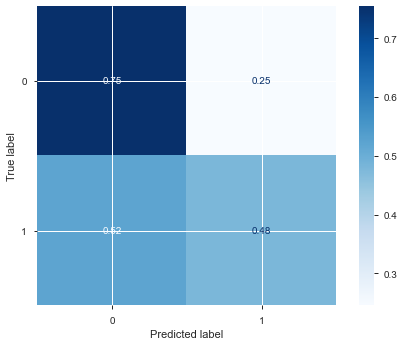

In [64]:
# import itertools
# from bs_ds.bs_ds import plot_confusion_matrix
y_test_pred = cb_clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(cb_clf,X_test,y_test,normalize='true',cmap='Blues')# classes=['Not-Recidivist', 'Recidivist'], normalize=True, cmap='Blues',
#                       title='Confusion Matrix: CatBoost Recidivist Classifcation\n')
# plot_confusion_matrix(conf_matrix, classes=['Not-Recidivist', 'Recidivist'], normalize=True, cmap='Blues',
#                       title='Confusion Matrix: CatBoost Recidivist Classifcation\n')

## Adding XGB and SHAP 09/05/19
'

In [65]:
from xgboost import XGBClassifier,plot_importance, plot_tree

xgb_clf = XGBClassifier()
xgb_clf.fit(X=X_train, y=y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

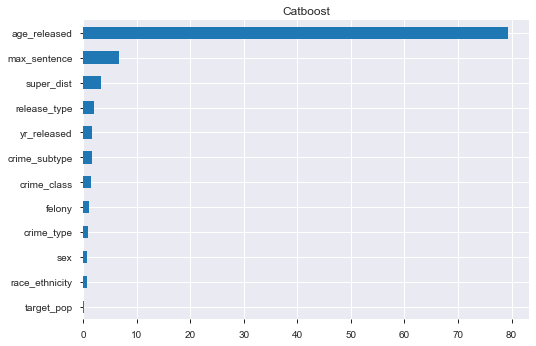

In [66]:
#catboost importance
important_features.sort_values().plot(kind='barh',title='Catboost')

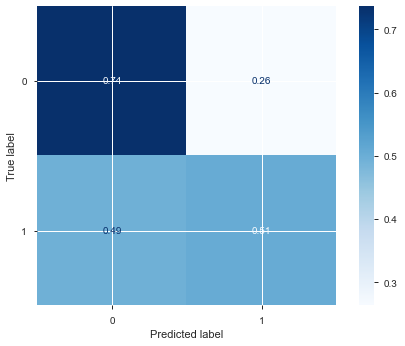

In [67]:
y_hat_test  = xgb_clf.predict(X_test)
plot_confusion_matrix(xgb_clf,X_test,y_test,normalize='true',cmap='Blues')

0.6589639899865203


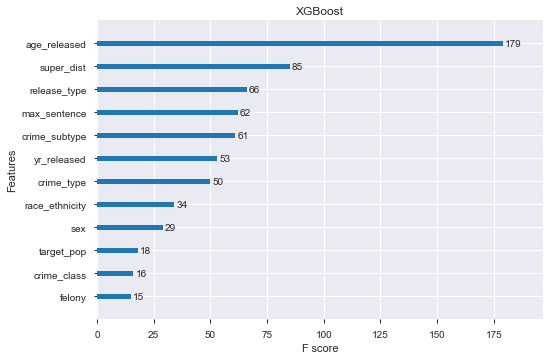

In [68]:
print(xgb_clf.score(X_test,y_test))
plot_importance(xgb_clf,title="XGBoost")

# CONCLUSIONS

In [ ]:
# pause

- **After adjusting for imbalanced classes, the most important factor for determining recidivism are:**
    - **Age at Release**
    - **Supervising Judicial District**
    - **Release Type**
    - **Crime Subtype**
    
    
## Recommendatons
- This model could be used to predict which prisoners due for release may at the greatest risk for recidivism.<br><br>
    - Using this knowledge, the state of Iowa could put new programs into action that target those at high risk for recidivism and provide additional assistance and guidance following release.<br><br>
    - Additionally, there could be additional counseling or education _prior_ to release to supply the inmate with tools and options to avoid returning to a life of crime.
    
# FUTURE DIRECTIONS
- With more time and reliable performance, would perform cross-validation of our final model.<br><br>
- Additional visuals summarizing the underlying features effects on recidivism.<br><br>
- Adapting more available visualization tools to better display the underpinning of the model.
<br><br>
- Exploration of the predictability of crimes types committed by recidivists.

# Using SHAP and Shapely Values for Model Interpretation



- White Paper on Shapely Values:
    - https://arxiv.org/abs/1705.07874
    
- Blog Posts:
    - https://towardsdatascience.com/explain-your-model-with-the-shap-values-bc36aac4de3d

    - https://towardsdatascience.com/explain-any-models-with-the-shap-values-use-the-kernelexplainer-79de9464897a


- Videos/Talks:
    - ["Open the Black Box: an intro to Model Interpretability with LIME and SHAP](https://youtu.be/C80SQe16Rao)
    

## Using SHAP

- Uses game theory to explain feature importance and how a feature steered a model's prediction(s) by removing each feature and seeing the effect on the error.

- SHAP has:
    - `TreeExplainer`:
        - compatible with sckit learn, xgboost, Catboost
    - `KernelExplainer`:
        - compatible with "any" model
        
        
- To import and initialize javascript:
```python
import shap 
shap.initjs()
```

### To Get Expanations for Trees:


1. Create a shap explainer using your fit model.
2. Get shapely values from explainer for your training data
3. Select which type of the available plots you'd like to visualize


    
- **Types of Plots:**
    - `summary_plot()`
    - `dependence_plot()`
    - `force_plot()` for a given observation
    - `force_plot()` for all data

In [69]:
import shap 
shap.initjs()

In [70]:
explainer = shap.TreeExplainer(xgb_clf)
shap_values = explainer.shap_values(X_train,y_train)

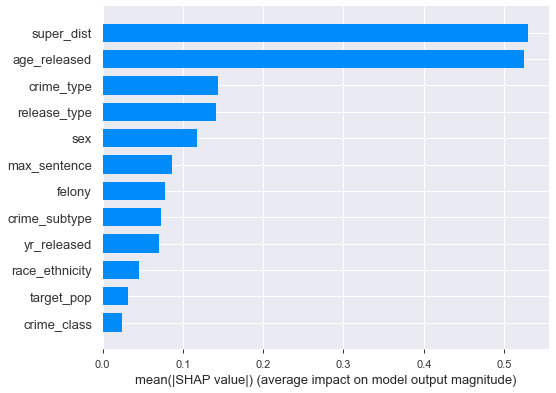

In [71]:
shap.summary_plot(shap_values,X_train,plot_type='bar')

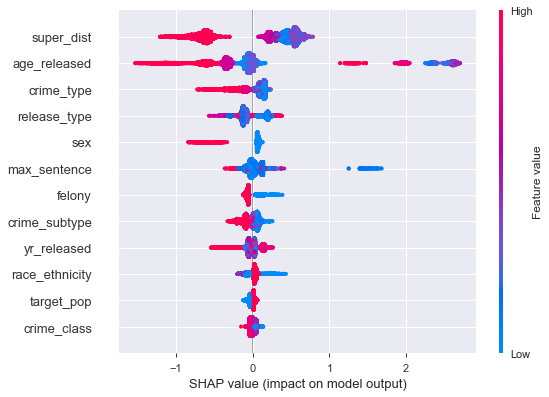

In [72]:
shap.summary_plot(shap_values, X_train)

**`shap.summary_plot`**
> - Feature importance: Variables are ranked in descending order.
- Impact: The horizontal location shows whether the effect of that value is associated with a higher or lower prediction.
- Original value: Color shows whether that variable is high (in red) or low (in blue) for that observation.
- Correlation: A high level of the “alcohol” content has a high and positive impact on the quality rating. The “high” comes from the red color, and the “positive” impact is shown on the X-axis. Similarly, we will say the “volatile acidity” is negatively correlated with the target variable.

- from https://towardsdatascience.com/explain-your-model-with-the-shap-values-bc36aac4de3d

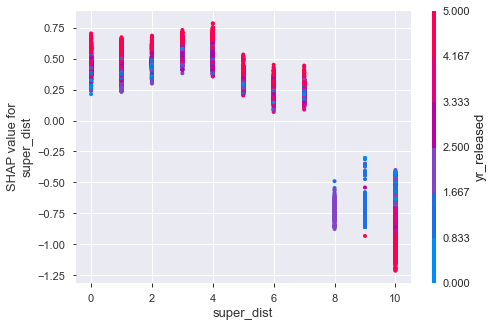

In [73]:
shap.dependence_plot('super_dist', shap_values, X_train)

In [74]:
X_train.head()

max_sentence  age_released  yr_released  race_ethnicity  crime_class  \
0      0.056222          0.50            0               2            4   
1      0.015775          0.25            2               4            1   
2      0.015775          0.00            1               4            1   
3      0.015775          0.00            5               4            1   
4      0.056222          0.00            5               4            4   

   release_type  crime_type  crime_subtype  target_pop  sex  super_dist  \
0             2           2              7           1    0           6   
1             1           4              3           0    0          10   
2             1           4              3           0    0          10   
3             0           2              4           1    0           1   
4             9           4              3           1    0           7   

   felony  
0       1  
1       0  
2       0  
3       0  
4       1

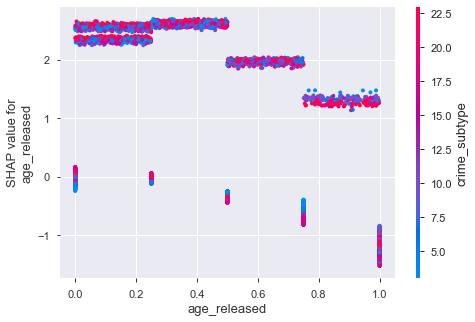

In [75]:
shap.dependence_plot('age_released', shap_values, X_train)

In [76]:
import shap
shap.initjs()
explainer = shap.TreeExplainer(xgb_clf)

In [77]:
shap_values  = explainer.shap_values(X=X_train,y=y_train)
shap_interaction_values = explainer.shap_interaction_values(X_train)

In [78]:
# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:])

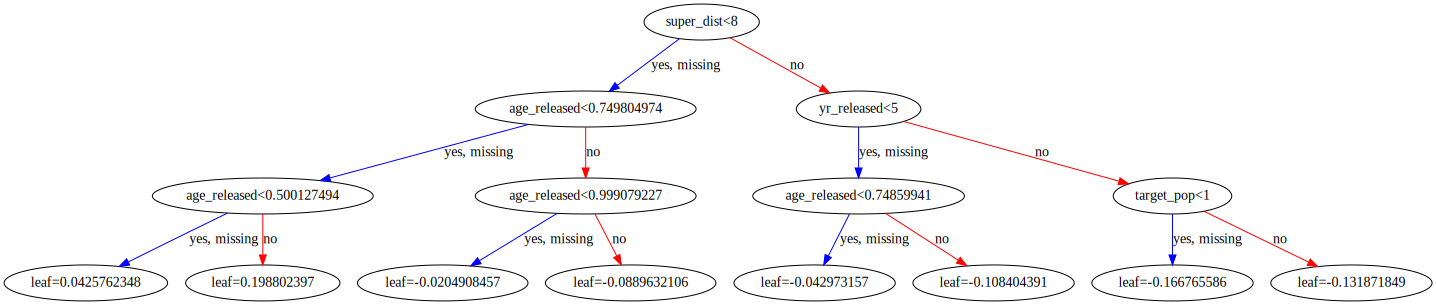

In [79]:
import xgboost as xgb
xgb.to_graphviz(xgb_clf)

In [80]:
import graphviz as gv
gv.dot.Digraph()

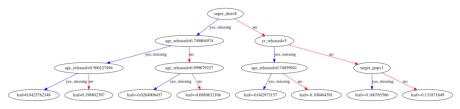

In [81]:
import xgboost as xgb

ax = xgb.plot_tree(xgb_clf,**{'dpi':'300'})


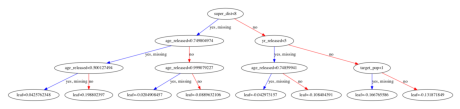

In [82]:
plot_tree(xgb_clf)


In [83]:
print(shap_interaction_values.shape)#[0].shape
print(shap_interaction_values[0].shape)
shap_interaction_values[0]

(27674, 12, 12)
(12, 12)


array([[ 5.74770570e-03, -1.56325102e-03,  7.73822889e-04,
         5.00395522e-03,  1.22122560e-02, -1.32142752e-03,
        -1.64788775e-02,  2.53253058e-02,  4.08650376e-04,
         8.99890438e-04,  2.45688856e-03, -3.76724675e-02],
       [-1.56320678e-03, -3.36650372e-01,  7.98170641e-03,
         3.29579413e-03,  1.29622407e-02, -1.24424696e-06,
         1.21108070e-03,  1.54801123e-02, -2.08851416e-04,
        -1.09063275e-03, -2.09496394e-02,  7.27400184e-04],
       [ 7.73823354e-04,  7.98167288e-03, -2.78988965e-02,
         2.88236886e-04, -2.94838101e-05, -1.92922018e-02,
         7.71358609e-05,  4.54284996e-03, -5.14415978e-03,
         4.01016884e-03,  1.52429938e-03, -3.10638919e-04],
       [ 5.00394776e-03,  3.29582393e-03,  2.88238749e-04,
        -6.63222894e-02,  5.56228217e-04, -1.14828348e-04,
        -3.85231525e-03,  7.55169615e-03,  0.00000000e+00,
        -1.12852082e-03, -1.23895407e-02,  1.17145479e-04],
       [ 1.22122532e-02,  1.29622072e-02, -2.9485672

In [84]:
shap_values.reshape(2,-1)


array([[-0.00420755, -0.31880566, -0.0334772 , ...,  0.07685826,
        -0.5118062 ,  0.14095034],
       [-0.00479984, -0.10183606,  0.11425292, ...,  0.05969249,
         0.38337496, -0.06220771]], dtype=float32)

In [85]:
df_shap = pd.DataFrame(shap_values, columns=X_train.columns, index=X_train.index)
# df_shap = pd.Series([x for x in shap_values])
df_shap.head()

max_sentence  age_released  yr_released  race_ethnicity  crime_class  \
0     -0.004208     -0.318806    -0.033477       -0.066994    -0.004886   
1      0.008123     -0.025169     0.028438        0.043580     0.039390   
2      0.002662     -0.079213     0.032529        0.020462     0.019407   
3     -0.059035     -0.093366    -0.107213        0.016827     0.019192   
4      0.022147      0.091407    -0.057947        0.019758    -0.010001   

   release_type  crime_type  crime_subtype  target_pop       sex  super_dist  \
0     -0.132594    0.091519       0.110976    0.010856  0.063378    0.202459   
1      0.193840   -0.174482       0.054632   -0.033010  0.079913   -0.546856   
2      0.176730   -0.152927       0.055618   -0.033010  0.082613   -0.547069   
3      0.158390    0.084895       0.035208    0.025259  0.057877    0.603583   
4      0.200357   -0.123739       0.007532    0.027496  0.086386    0.300434   

     felony  
0 -0.061108  
1  0.140950  
2  0.149000  
3  0.049470  
4 -0.078723

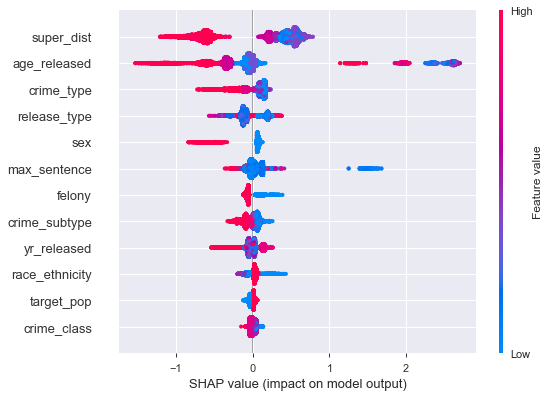

In [86]:
shap.summary_plot(shap_values,features=X_train)

In [87]:
# shap.dependence_plot(X_train,shap_values=shap_values,features=X_train, interaction_index=y)

In [ ]:
from ipywidgets import interact, interactive, interactive_output

#explainer.shap_interaction_values(X_train)
list_cols = list(X_train.columns)

@interact(X=list_cols, y=list_cols)
def show__dependence_plot(X='super_dist', y='age_released'):
    shap.dependence_plot(X,shap_values=shap_values,features=X_train, interaction_index=y)

In [ ]:
shap.summary_plot(shap_interaction_values, X_train)

In [ ]:
from ipywidgets import interact, interactive, interactive_output

#explainer.shap_interaction_values(X_train)
list_cols = list(X_train.columns)

@interact(X=list_cols, y=list_cols)
def show_interaction_plot(X='age_released'):
    explainer.shap_interaction_values(X)#,shap_values=shap_values,features=X_train, interaction_index=y)

### Noteable comparisons

**1. y='age_released', X=supervisng dsitrict**

In [ ]:
from ipywidgets import interact
col_list = list(X_train.columns)
@interact(plot_column=col_list)
def plot_shap_values(plot_column=col_list):
    fig=plt.figure()
#     fig = plt.figure(figsize=(10,10))
    fig = shap.dependence_plot(plot_column, shap_values, X_train)
#     plt.show()

In [ ]:
plot_tree(xgb_clf)
# bs.viz_tree(xgb_clf)

In [ ]:
df_full.index